In [1]:
import pandas as pd
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline  
%autosave 300

Autosaving every 300 seconds


In [2]:
pd.options.display.max_columns = None
feature_names =defaultdict(lambda:'None')

In [24]:
city_indicators=pd.read_csv('data/City Indicators.csv')
drought_data=pd.read_csv('data/Drought Data.csv')
flood_data=pd.read_csv('data/Flood Data.csv')
heat_data=pd.read_csv('data/Heat Data.csv')
historical=pd.read_csv('data/Historical Hazards Outcome Data.csv')
risk_recovery=pd.read_csv('data/Overall Risk & Readiness Scores.csv')
sea_level_data=pd.read_csv('data/Sea Level Rise Data.csv')



In [ ]:
df=historical.copy()
df.shape
#Counter(df['Historical Average Cost of Cold Event'])


In [26]:
df.corr()

,Percent of GDP based on water intensive industries_2015,Percentage of workforce in Farming Fishing and Forestry 2015,Baseline water stress_2014,Readiness to accept adaptation investment_2015,Tax incentives for renewable energy_2015,Total number of federal public corruption convictions by district_2015,Civic engagement_2010,General innovation capabilities_2015,Estimated percent of adults who think global warming is already harming people in the US now or within 10 years_2014,Percent of population with less than 12th grade education_2015,Population density_2015,Water quality_2015,City debt_2010,Percent of population in floodzone_2015,Percent of buildings in floodzone_2015,Percent of cars in floodzone_2015,Percent of area that is impervious surface_2011,Number of acute care hospital beds available per 1000 residents_2015,Percent of population that is 65 years old or older living alone_2015,Percent of population that is 5 years old or younger_2015,Percent of population with health insurance_2015,Percent of buildings built before 1999_2015,Percent of population residing in the mobile homes_2015,Percent of population spending over 50 percent of income on rent_2015,Percent of land covered by tree canopy_2011,Percent of houses with heating_2015,Percent of population with a disability_2015,Percent of population in poverty_2015,Percent of buildings built before 1979_2015,Outdoor workers_2015,Percent of households without access to a vehicle_2015,Percent of population in 1ft sea level rise zone_2015,Percent of population in 3ft sea level rise zone_2015,Average economic impact of 1ft sea level rise_2015,Average economic impact of 3ft sea level rise_2015,Unnamed: 40,Latitutde,Longitude,City Area_KM,2010 Population,2011 Population,2012 Population,2013 Population,2014 Population,2015 Population,Median Income
Percent of GDP based on water intensive industries_2015,1.000000,0.107647,-0.102995,0.000013,-0.169631,-0.125156,0.029982,0.121448,-0.025751,0.036527,-0.274790,0.022715,-0.089990,0.010829,0.011327,0.062850,-0.041980,-0.027052,-0.001855,0.197543,-0.059035,0.033192,0.089106,-0.070622,-0.018752,0.164833,0.021329,-0.027463,0.007553,0.135317,-0.222953,-0.051135,-0.071992,0.000526,-0.075092,NaN,0.081618,-0.171406,0.023771,-0.077187,-0.076802,-0.076716,-0.076497,-0.076334,-0.075819,0.022869
Percentage of workforce in Farming Fishing and Forestry 2015,0.107647,1.000000,0.106905,-0.061655,-0.012007,-0.059903,-0.096002,0.064658,-0.035118,0.034678,-0.067619,-0.001775,-0.065818,-0.045049,-0.043982,0.012218,-0.051103,-0.006427,0.010355,0.082539,-0.040084,-0.003083,0.072871,0.016801,-0.029381,0.014939,-0.013428,-0.021956,-0.027696,0.062913,-0.048830,-0.106259,-0.068923,0.063124,0.000184,NaN,-0.016227,-0.072015,-0.012287,-0.029525,-0.029450,-0.029446,-0.029510,-0.029599,-0.029705,-0.029036
Baseline water stress_2014,-0.102995,0.106905,1.000000,-0.099617,0.139674,0.117970,-0.020957,0.163022,-0.082691,0.054763,0.069629,0.123275,-0.087724,-0.007681,-0.008673,-0.141618,0.045682,-0.105864,-0.119211,0.031102,-0.014933,-0.003394,0.069762,-0.106522,-0.226750,-0.120526,-0.166028,-0.174383,-0.028698,-0.014814,-0.082347,-0.066486,-0.106845,-0.218173,-0.198107,NaN,-0.081981,-0.108500,-0.041796,-0.054532,-0.053961,-0.053539,-0.053203,-0.052944,-0.052716,0.176042
Readiness to accept adaptation investment_2015,0.000013,-0.061655,-0.099617,1.000000,0.079734,-0.251227,0.120091,-0.059081,0.064194,-0.144306,-0.024840,0.123943,0.239560,0.070766,0.064848,0.033319,-0.018542,0.186065,0.196585,0.007251,0.046336,0.075244,-0.231737,-0.174847,0.322072,0.148361,0.106926,0.170415,0.140387,-0.129797,0.279848,0.102064,0.163571,0.055796,0.129088,NaN,0.209808,0.323706,0.170775,0.146628,0.146867,0.146978,0.147381,0.147677,0.148245,-0.186755
Tax incentives for renewable energy_2015,-0.169631,-0.012007,0.139674,0.079734,1.000000,-0.085831,0.001394,0.062818,-0.337299,0.051018,0.297657,0.123474,0.216038,0.013732,0.016585,-0.032664,-0.015128,0.090135,0.145807,-0.173986,0.191079,0.123180,-0

ValueError: zero-size array to reduction operation minimum which has no identity

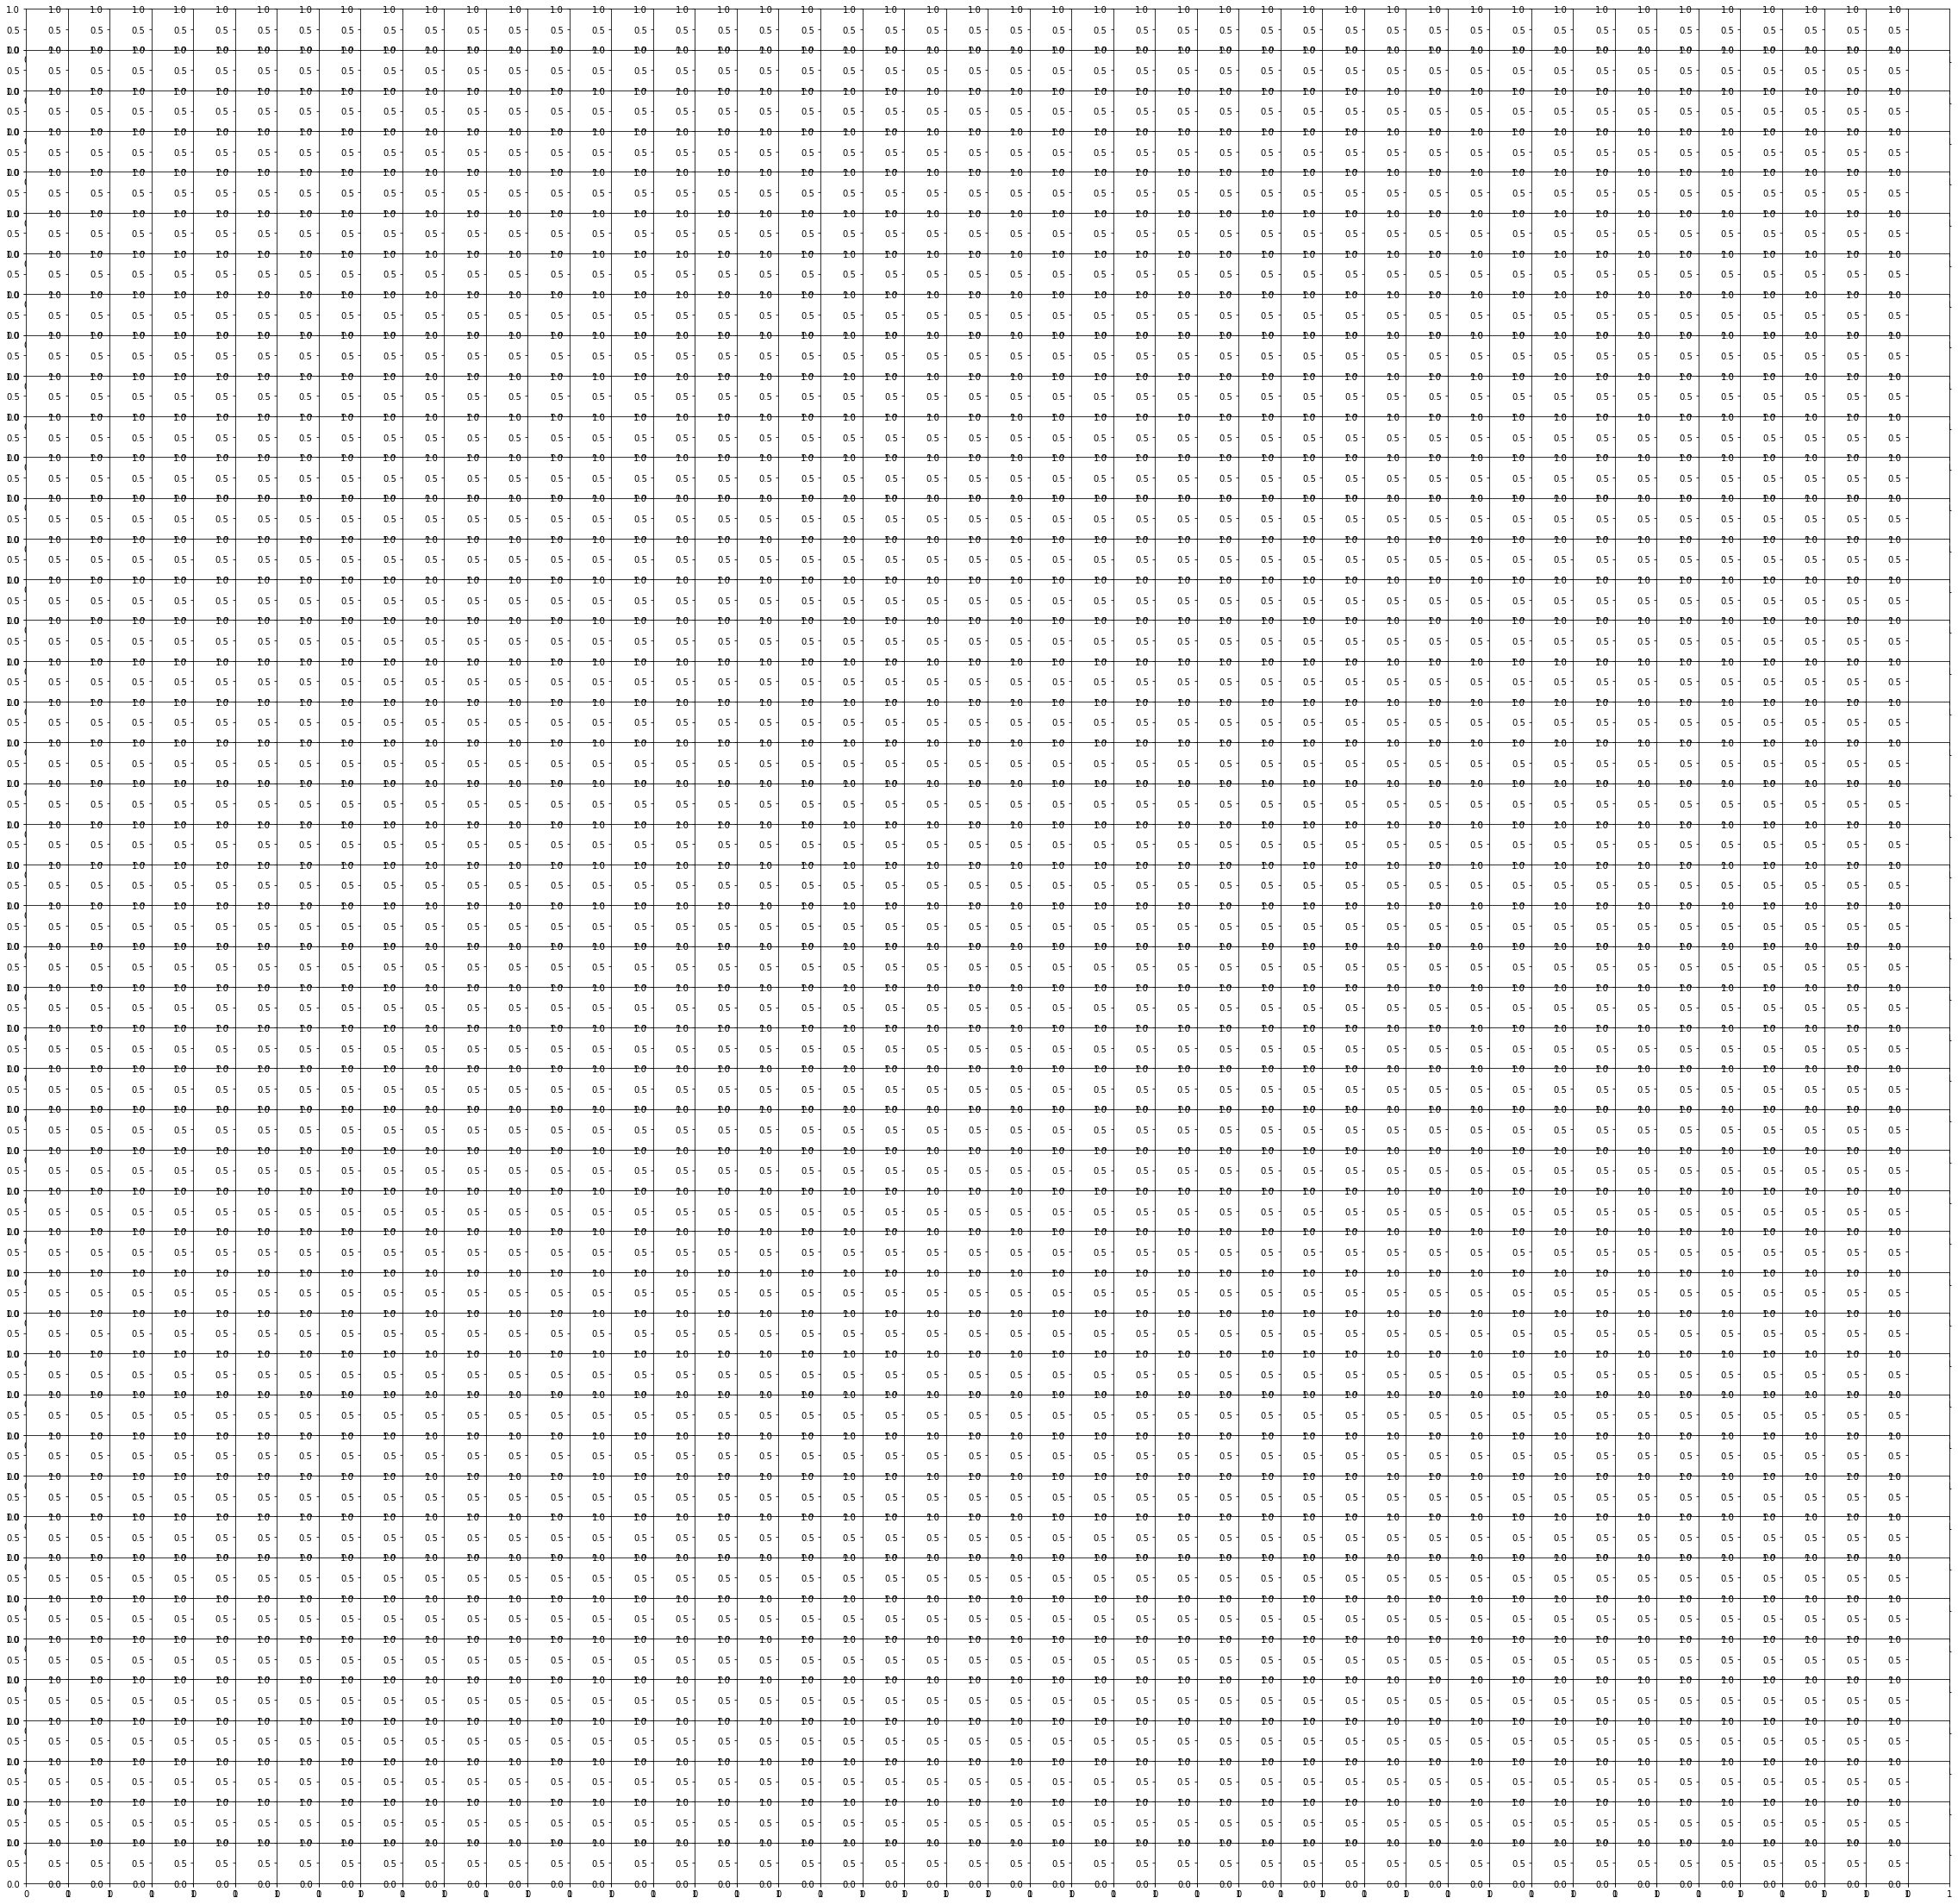

In [28]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(40,40))

plt.show()

In [ ]:
output=df.describe()
#output.to_csv('cold_data')
output

In [ ]:
df.columns

In [9]:
a=3
df.iloc[:,a].describe()
#charles=(df.iloc[:,a])
#print(df.iloc[20:150,a])
#print(df.iloc[24])

count    87.000000
mean      0.379602
std       0.160921
min       0.133983
25%       0.263383
50%       0.329982
75%       0.481455
max       0.797835
Name: Risk, dtype: float64

In [10]:
df.iloc[:,a].unique()


array([       nan, 0.42745858, 0.30597552, 0.21855682, 0.27894127,
       0.21551518, 0.69578637, 0.17066805, 0.22464895, 0.26438962,
       0.40862932, 0.27440228, 0.59615395, 0.23306216, 0.40390688,
       0.68452117, 0.57102984, 0.26237704, 0.59475059, 0.24322215,
       0.46612559, 0.19995257, 0.21285116, 0.44396509, 0.38556321,
       0.1927536 , 0.79783541, 0.2441338 , 0.28089739, 0.42973604,
       0.55152758, 0.64696398, 0.63138706, 0.6501582 , 0.18732345,
       0.26500931, 0.45314962, 0.13398315, 0.67836784, 0.32832016,
       0.3469878 , 0.17510352, 0.3232609 , 0.28563237, 0.4413623 ,
       0.29613581, 0.34212644, 0.4851584 , 0.77093709, 0.51311666,
       0.27694992, 0.58530035, 0.28281628, 0.55240682, 0.3033905 ,
       0.25312403, 0.32362708, 0.27712297, 0.43660392, 0.38967784,
       0.53869192, 0.36700377, 0.17284982, 0.28069909, 0.32998241,
       0.34591022, 0.24957041, 0.28360487, 0.22040383, 0.1960016 ,
       0.22831414, 0.34925548, 0.18667661, 0.47775173, 0.55111

df1 = df[df.isna().any(axis=1)]
print(df1)

In [11]:
#print(df['flood_hist_cost'].isna())
#df.fillna(0, inplace = True)
row=0
count=0
for value in df.iloc[:,a]:
    if value >0:
        print(df.iloc[row,0:2],df.iloc[row,a])
        
        count+=1
    row+=1
print(count)

City     Alexandria
State            VA
Name: 3, dtype: object 0.427458577
City     Antioch
State         CA
Name: 9, dtype: object 0.305975523
City     Baltimore
State           MD
Name: 17, dtype: object 0.21855681600000001
City     Baton Rouge
State             LA
Name: 18, dtype: object 0.278941266
City     Bayamon
State         PR
Name: 19, dtype: object 0.21551517899999997
City     Beaumont
State          TX
Name: 20, dtype: object 0.6957863679999999
City     Bellevue
State          WA
Name: 21, dtype: object 0.17066805300000001
City     Berkeley
State          CA
Name: 22, dtype: object 0.22464895199999999
City     Boston
State        MA
Name: 26, dtype: object 0.26438962
City     Bridgeport
State            CT
Name: 27, dtype: object 0.408629325
City     Brownsville
State             TX
Name: 28, dtype: object 0.274402278
City     Cape Coral
State            FL
Name: 33, dtype: object 0.596153946
City     Carlsbad
State          CA
Name: 34, dtype: object 0.233062164
City     C

In [23]:
city_indicators=pd.read_csv('data/City Indicators.csv')
city_indicators_old=df.columns
new_names=['city','state','geo_id','GDP_water_all','perc_fff','d_plan','w_plan','base_w_stress','invest','tax_break','corruption','perc_vote','innovate','climate_real','hs_ed','pop_dens','w_quality','debt','flood_pop','flood_build','flood_car','impervious','beds_1000','alone_65','child_5','health_ins','older_1999','mobile_home','rent_50plus','trees','heating','disabled','poverty','older_1979','work_outside','no_car','pop_under_1ft','pop_under_3ft','impact_plus1ft','impact_plus3ft', 'col_empty','lat','long','county','region','city_km2','pop_2010','pop_2011','pop_2012','pop_2013','pop_2014','pop_2015','median_income']
indicators_dict = dict(zip(new_names, city_indicators_old))
city_indicators.columns = new_names
city_indicators.drop(columns =['col_empty'], inplace= True)

feature_names['city_indicators']=indicators_dict

city_indicators.columns


Index(['city', 'state', 'geo_id', 'GDP_water_all', 'perc_fff', 'd_plan',
       'w_plan', 'base_w_stress', 'invest', 'tax_break', 'corruption',
       'perc_vote', 'innovate', 'climate_real', 'hs_ed', 'pop_dens',
       'w_quality', 'debt', 'flood_pop', 'flood_build', 'flood_car',
       'impervious', 'beds_1000', 'alone_65', 'child_5', 'health_ins',
       'older_1999', 'mobile_home', 'rent_50plus', 'trees', 'heating',
       'disabled', 'poverty', 'older_1979', 'work_outside', 'no_car',
       'pop_under_1ft', 'pop_under_3ft', 'impact_plus1ft', 'impact_plus3ft',
       'lat', 'long', 'county', 'region', 'city_km2', 'pop_2010', 'pop_2011',
       'pop_2012', 'pop_2013', 'pop_2014', 'pop_2015', 'median_income'],
      dtype='object')

fig = plt.figure()

count=1
drop_list=list(city_indicators.columns)
for header in city_indicators.columns:
    x=city_indicators[header]
    for header2 in drop_list:
        plt.show(count)
        y=city_indicators[header2]
        ax = fig.add_subplot()
        plt.scatter(x, y, alpha=0.5)
        
        drop_list.remove(header2)
        count+=1

In [12]:
flood_data=pd.read_csv('data/Flood Data.csv')
flood_data_old=df.columns
new_names=['city', 'state','geo_id','flood_risk','flood_vuln','flood_expose','flood_sens','flood_adapt','flood_ready','flood_social','flood_gov','flood_econ','flood_hist_cost','flood_future_cost','flood_prob_2040','flood_prob_2019_40']
flood_data.columns = new_names


flood_dict = dict(zip(new_names, flood_data_old))
feature_names['flood']=flood_dict

In [13]:
cold_data=pd.read_csv('data/Cold Data.csv')
cold_data_old=df.columns
new_names=['city', 'state', 'geo_id', 'cold_risk', 'cold_vuln', 'cold_expose','cold_sens', 'cold_adapt', 'cold_ready', 'cold_social', 'cold_govG','cold_econ', 'cold_hist_cost', 'cold_p_heat2040']
cold_data.columns = new_names


cold_dict = dict(zip(new_names, cold_data_old))
feature_names['cold_data']=cold_dict
#cold_data.head()

In [14]:
risk_recovery=pd.read_csv('data/Overall Risk & Readiness Scores.csv')
risk_recovery_old=risk_recovery.columns
new_names=['city', 'state', 'geo_id','overall_risk', 'overall_readiness']
risk_recovery.columns = new_names


risk_recovery_dict = dict(zip(new_names, risk_recovery_old))
feature_names['risk_recovery']=risk_recovery_dict
risk_recovery.

In [15]:
drought_data=pd.read_csv('data/Drought Data.csv')
drought_data.drop(columns=['Unnamed: 14'], inplace=True)
old_columns=drought_data.columns
new_names=['city', 'state', 'geo_id','drought_risk', 'drought_vuln', 'drought_expose','drought_sens', 'drought_adapt', 'drought_ready', 'drought_social', 'drought_gov','drought_econ', 'drought_hist_cost','drought_future_cost','drt_dev_forecast','drt_dev_for_vs_norm','drt_.5sdev_G','drt_.5sdev_G','drt_dist_sdev']
drought_data.columns = new_names


drought_dict = dict(zip(new_names, old_columns))
feature_names['drought_data']=drought_dict
feature_names

defaultdict(<function __main__.<lambda>()>,
            {'flood': {'city': 'City',
              'state': 'State',
              'geo_id': 'Geo.ID',
              'flood_risk': 'Risk',
              'flood_vuln': 'Vulnerability',
              'flood_expose': 'Exposure',
              'flood_sens': 'Sensitivity',
              'flood_adapt': 'Adaptive Capacity',
              'flood_ready': 'Readiness',
              'flood_social': 'Social',
              'flood_gov': 'Governance',
              'flood_econ': 'Economic',
              'flood_hist_cost': 'SLR in 2040',
              'flood_future_cost': 'Projected Cost 1ft SLR'},
             'cold_data': {'city': 'City',
              'state': 'State',
              'geo_id': 'Geo.ID',
              'cold_risk': 'Risk',
              'cold_vuln': 'Vulnerability',
              'cold_expose': 'Exposure',
              'cold_sens': 'Sensitivity',
              'cold_adapt': 'Adaptive Capacity',
              'cold_ready': 'Readiness',
 

In [16]:
heat_data=pd.read_csv('data/Heat Data.csv')
new_names=['city','state','geo_id','heat_risk','heat_vuln','heat_expose','heat_sens','heat_adapt','heat_ready','heat_social','heat_gov','heat_econ','heat_hist_cost','heat_prob_2040']
old_columns=heat_data.columns
heat_data.columns = new_names

heat_data_dict = dict(zip(new_names, old_columns))
feature_names['heat_data']=heat_data_dict
heat_data.columns

Index(['city', 'state', 'geo_id', 'heat_risk', 'heat_vuln', 'heat_expose',
       'heat_sens', 'heat_adapt', 'heat_ready', 'heat_social', 'heat_gov',
       'heat_econ', 'heat_hist_cost', 'heat_prob_2040'],
      dtype='object')

In [17]:
historical=pd.read_csv('data/Historical Hazards Outcome Data.csv')
new_names=['city', 'state', 'geo_id','fl_instances', 'fl_inj_direct' 
           ,'fl_inj_indirect','fl_inj_total'\
           , 'fl_death_direct' ,'fl_death_indirect','fl_death_total',
           'flood_damage'\
           ,'ht_instances', 'ht_inj_direct' ,'ht_inj_indirect','ht_inj_total'\
           , 'ht_death_direct' ,'ht_death_indirect','ht_death_total','heat_damage'\
          ,'cld_instances', 'cld_inj_direct' ,'cld_inj_indirect','cld_inj_total'\
           ,'cld_death_direct' ,'cld_death_indirect','cld_death_total','cold_damage'\
           ,'coast_fl_instances', 'coast_fl_inj_direct' ,'coast_fl_inj_indirect','coast_fl_inj_total'\
           , 'coast_fl_death_direct' ,'coast_fl_death_indirect','coast_fl_death_total','coast_fl_damage']
 
old_columns=historical.columns
historical.columns = new_names
historical_dict = dict(zip(new_names, old_columns))
feature_names['historical']=historical_dict
#historical.columns

In [18]:
sea_level_data=pd.read_csv('data/Sea Level Rise Data.csv')
new_names=['city', 'state', 'geo_id', 'sea_rise_risk', 'sea_rise_vuln', 'sea_rise_expos',
       'sea_rise_sens', 'sea_rise_adapt', 'sea_rise_ready', 'sea_rise_social', 'sea_rise_gov',
       'sea_rise_econ', 'sea_rise2040', 'sea_rise_cost+1ft']

old_columns=sea_level_data.columns
sea_level_data.columns = new_names
sea_level_data_dict = dict(zip(new_names, old_columns))
feature_names['sea_level_data']=sea_level_data_dict
sea_level_data.columns

Index(['city', 'state', 'geo_id', 'sea_rise_risk', 'sea_rise_vuln',
       'sea_rise_expos', 'sea_rise_sens', 'sea_rise_adapt', 'sea_rise_ready',
       'sea_rise_social', 'sea_rise_gov', 'sea_rise_econ', 'sea_rise2040',
       'sea_rise_cost+1ft'],
      dtype='object')